<a href="https://colab.research.google.com/github/YoooonaLee/machine_learning/blob/main/%EC%95%84%EB%8B%AC%EB%A6%B0_%26_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Iris Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
iris = load_iris()

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌåêÎã§Ïä§ DataFrameÏúºÎ°ú Î≥ÄÌôò
iris_df = pd.DataFrame(data=iris.data,   columns=iris.feature_names)


iris_df['label'] = iris.target


binary_df = iris_df[iris_df['label'].isin([0, 1])]


X = binary_df[iris.feature_names]
y = binary_df['label']


#Ìä∏Î†àÏù∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Ïä§ÏºÄÏùº Ï†ÅÏö© (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê fitÌïòÍ≥†, ÎèôÏùºÌïú Ïä§ÏºÄÏùºÏùÑ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # X_trainÏóê Ïä§ÏºÄÏùº Ï†ÅÏö©
X_test_scaled = scaler.transform(X_test)        # X_trainÏùò Ïä§ÏºÄÏùº Ï†ïÎ≥¥Î°ú X_test Ïä§ÏºÄÏùº Ï†ÅÏö©


#ÎÇ¥Ïö©Ï†ïÎ¶¨

ÏïÑÎã¨Î¶∞ vs ÌçºÏÖâÌä∏Î°† (ÎëòÎã§ Ïù¥ÏßÑÎ∂ÑÎ•ò)

Í≤∞Íµ≠Ïóî thresholdÎ•º Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî Ìä∏Î†àÏù¥Îãù Í≥ºÏ†ïÏóê ÏÇ¨Ïö©ÌïòÎÉê ÏïàÌïòÎÉêÍ∞Ä Í∞ÄÏû• ÌÅ∞Ï∞®Ïù¥


‚ñ∂ÌçºÏÖâÌä∏Î°†ÏùÄ thresholdÌï®ÏàòÎ•º ÏßÄÎÇú ÏòàÏ∏°ÎùºÎ≤®Í∞í ÏûêÏ≤¥Î•º Ïù¥Ïö©Ìï¥ÏÑú Ïã§Ï†ú ÎùºÎ≤®Í∞íÍ≥ºÏùò Ïò§Ï∞®Î•º Íµ¨ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïò§Ï∞®Í∞í (y-y^)Í∞í ÏûêÏ≤¥Í∞Ä binary

 => Îî∞ÎùºÏÑú Ï†ïÍµêÌïú Ïò§Ï∞®updateÎäî ÌûòÎì§Îã§


‚ñ∂ÌïòÏßÄÎßå ÏïÑÎã¨Î¶∞ÏùÄ ÌôúÏÑ±ÌôîÌï®Ïàò(Ìï≠Îì±Ìï®Ïàò)Î•º Í±∞ÏπúÎã§ÏùåÏóê ÏõêÎûòÏùò Í∞ÄÏ§ëÏπòÍ∞íÍ≥º Ïã§Ï†ú Î†àÏù¥Î∏îÍ∞íÏùò Ïò§Ï∞®Î•º Íµ¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î≥¥Îã§ Ï†ïÍµêÌïòÍ≤å updateÌï† Ïàò ÏûàÎã§.
Í∑∏Î¶¨Í≥† ÌçºÏÖâÌä∏Î°†Í≥º Îã§Î•¥Í≤å thresholdÎäî ÎßàÏßÄÎßâ ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÌï† ÎïåÎßå ÏÇ¨Ïö©Ìï®.

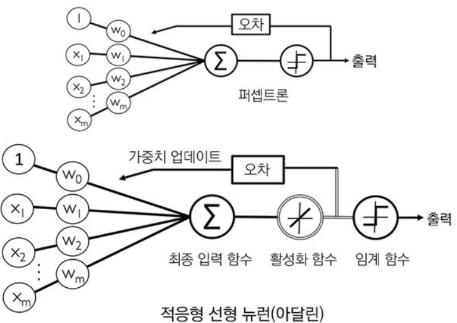

#Adaline(Adaptive linear neuron)ÏùÑ ÏÇ¨Ïö©Ìïú Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò

In [ ]:
X_train #test size =0.2

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
52                6.9               3.1                4.9               1.5
60                5.0               2.0                3.5               1.0
66                5.6               3.0                4.5               1.5
68                6.2               2.2                4.5               1.5
..                ...               ...                ...               ...
17                5.1               3.5                1.4               0.3
36                5.5               3.5                1.3               0.2
85                6.0               3.4                4.5               1.6
21                5.1               3.7                1.5               0.4
25                5.0               3.0                1.6               0.2

[80 rows x 4 columns]

In [ ]:
y_train

15    0
52    1
60    1
66    1
68    1
     ..
17    0
36    0
85    1
21    0
25    0
Name: label, Length: 80, dtype: int64

In [ ]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=30):
        self.eta = eta        # ÌïôÏäµÎ•†
        self.n_iter = n_iter  # Î∞òÎ≥µ ÌöüÏàò

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî (X ÌîºÏ≤ò + bias)
        self.cost_ = []  # ÎπÑÏö© Ìï®Ïàò Í∞í Ï†ÄÏû•

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output  #Ïã§Ï†ú Î†àÏù¥Î∏îÍ∞í - Ìï≠Îì±Ìï®ÏàòÎ•º Í±∞Ïπú zÍ∞í
            self.w_[1:] += self.eta * X.T.dot(errors) #‚≠ê
            #  Œîw_j = Œ∑*Œ£(y_i -  z_i) x_ij  (ÎπÑÏö©Ìï®Ïàò SSE,J(w)Ïùò Ìé∏ÎèÑÌï®ÏàòÏóê ÌïôÏäµÎ•†ÏùÑ Í≥±ÌïúÍ∞íÏù∏ Œîw_jÎ•º Í∞ÅÍ∞ÅÏùò Í∞ÄÏ§ëÏπòÏóê ÏóÖÎç∞Ïù¥Ìä∏)
            #   w_j := w_j + Œîw_j
            #  ÌñâÎ†¨ Ïó∞ÏÇ∞ Í≤∞Í≥ºÎäî Í∞Å Í∞Å  w1,w2,w3,w4ÏóêÎåÄÌïú Í∏∞Ïö∏Í∏∞ Í∞íÎì§Ïùò Î∞∞Ïó¥?
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0   # SSE  cost function
            self.cost_.append(cost)          # Í∞ÅÍ∞Å ÏóêÌè¨ÌÅ¨ÎßàÎã§ loss check
        return self




    def net_input(self, X):
        """Í∞ÄÏ§ëÌï© Í≥ÑÏÇ∞"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        #ÏóÖÎç∞Ïù¥Ìä∏ Îêú weightÎì§ÏùÑ Í∞ÄÏßÄÍ≥† Í∞ÄÏ§ëÌï© Í≥ÑÏÇ∞

    def activation(self, X):
        """Ìï≠Îì± Ìï®Ïàò: ADALINEÏùÄ ÏÑ†Ìòï ÌôúÏÑ±Ìôî Ìï®Ïàò ÏÇ¨Ïö©"""
        return X

    def predict(self, X):
        """ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î Î∞òÌôò"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        #ÎßàÏßÄÎßâ ÏòàÏ∏°Ìï† ÎïåÎßå!!! threshold Ï†ÅÏö©Ìï¥ÏÑú Î†àÏù¥Î∏î Î∞òÌôò

learning rate=0.2  Ï†ïÌôïÎèÑÎäî 0.00%
learning rate=0.02  Ï†ïÌôïÎèÑÎäî 0.00%
learning rate=0.002  Ï†ïÌôïÎèÑÎäî 0.00%
learning rate=0.0002  Ï†ïÌôïÎèÑÎäî 50.00%
learning rate=2e-05  Ï†ïÌôïÎèÑÎäî 50.00%


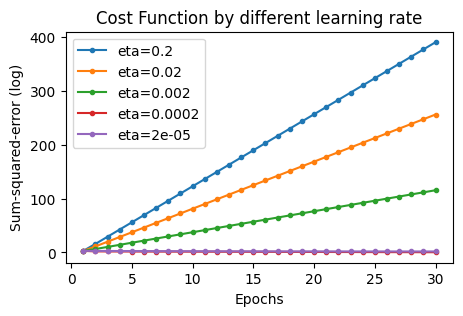

In [ ]:

eta_list = [0.2, 0.02, 0.002,0.0002,0.00002]
plt.figure(figsize=(5,3))

# Í∞ÅÍ∞ÅÏùò ÌïôÏäµÎ•†Ïóê ÎåÄÌï¥ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
for eta_value in eta_list:
    adaline = AdalineGD(eta=eta_value, n_iter=30)
    adaline.fit(X_train, y_train)
    plt.plot(range(1, 31), np.log(adaline.cost_), marker='.', label=f'eta={eta_value}')
    y_pred = adaline.predict(X_test) #ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùÑ Í∞ÄÏßÄÍ≥† ÏòàÏ∏°
    print(f"learning rate={eta_value}  Ï†ïÌôïÎèÑÎäî {accuracy_score(y_test, y_pred) * 100:.2f}%")

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error (log)')
plt.title('Cost Function by different learning rate')
plt.legend()
plt.show()


learning rateÎ•º 0.002ÍπåÏßÄ Ï§ÑÏòÄÏùÑ Îïå ÏóêÌè¨ÌÅ¨ÎßàÎã§ Ïò§Ï∞®Í∞íÏù¥ Ïò§ÌûàÎ†§ Ïª§Ïßê

Í∑∏ ÎØ∏Îßå learning rate(Îπ®Í∞ïÏÉâ,Î≥¥ÎùºÏÉâ) Í∑∏ÎûòÌîÑ Í∞úÌòï ÌôïÏù∏ ÌïÑÏöî

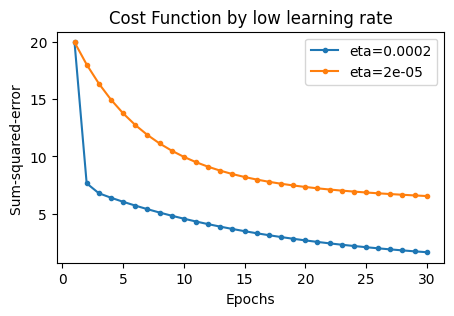

In [ ]:
low_eta_list=[0.0002,0.00002]
plt.figure(figsize=(5,3))

for eta_value in low_eta_list:
    adaline = AdalineGD(eta=eta_value, n_iter=30)
    adaline.fit(X_train, y_train)
    plt.plot(range(1, 31), adaline.cost_, marker='.', label=f'eta={eta_value}')

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error ')
plt.title('Cost Function by low learning rate')
plt.legend()
plt.show()

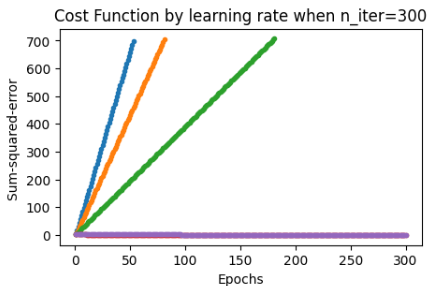

##üìë

‚ñ∂ÌïôÏäµÎ•†Ïù¥ ÌÅ¨Î©¥ cost functionÏù¥ epochÍ∞Ä Ï¶ùÍ∞ÄÌï† ÎïåÎßàÎã§ Ïª§Ï†∏Î≤ÑÎ¶º.


ÏïÑÎßàÎèÑ global minimumÏóê Ï†ïÏ∞© Î™ªÌïòÍ≥† diverseÎêú Í≤∞Í≥ºÏπò.




‚ñ∂ÌïôÏäµÎ•†Ïù¥ ÏûëÏùÑ Í≤ΩÏö∞Ïóî... epochÍ∞Ä Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº SSEÍ∞íÏù¥ Í∞êÏÜåÌïòÎäî Í∞úÌòïÏùÄ ÌôïÏù∏Îê®.

 ÌïòÏßÄÎßå ÎÑàÎ¨¥ ÌïôÏäµÎ•†, ÌïôÏäµÏñë?Ïù¥ Ï†ÅÏñ¥ÏÑú global minimumÏóê Ï†ïÏ∞©ÌïòÎ†§Î©¥ ÏóêÌè¨ÌÅ¨ ÏàòÍ∞Ä ÎßéÏù¥ ÌïÑÏöîÌï®.


#Logistic Regression(Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)Î•º ÏÇ¨Ïö©Ìïú Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò


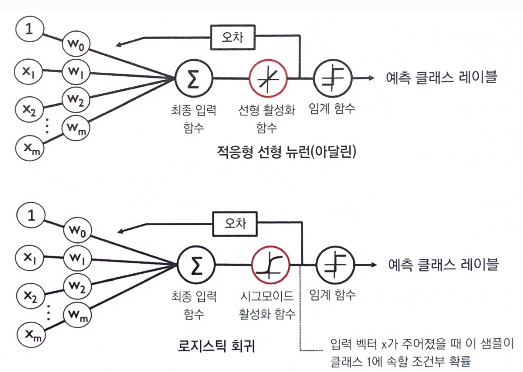

üñäÎ°úÏßÄÏä§Ìã± ÌöåÍ∑Ä => **ÌôïÎ•†**ÏùÑ Î™®Îç∏ÎßÅÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÏûÑ


 ÌöåÍ∑ÄÏßÄÎßå Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ïù¥ÏßÑÎ∂ÑÎ•ò Î™®Îç∏ =>  
 Í≤∞Í≥ºÍ∞Ä ÌôïÎ•†Î°ú ÎÇòÏôÄÏÑú,Í∑∏ ÌôïÎ•†Í∞íÏùÑ Í∞ÄÏßÄÍ≥†  0 or 1Î°ú Î∂ÑÎ•òÎ•º Ìï®.


üñäÍ∑∏ÎûòÏÑú ÏÑ†ÌòïÎ∞©Ï†ïÏãù(z=w^tx+...)ÏùÑ Ïù∏ÌíãÍ∞íÏúºÎ°ú Î∞õÏïÑÏÑú



  0~1ÏÇ¨Ïù¥Ïùò ÌôïÎ•†Í∞íÏùÑ Î∞òÌôòÌï¥Ï£ºÎäî ‚≠êÏãúÍ∑∏Î™®Ïù¥ÎìúÌï®Ïàò (ÌôúÏÑ±Ìï®Ïàò)Í∞Ä Íº≠ ÌïÑÏöîÌï®ÏùÑ Í∏∞Ïñµ

  (Ïó¨Í∏∞ÏÑú ÌôïÎ•† pÎ•º ÏÑ†ÌòïÎ∞©Ï†ïÏãùÏúºÎ°ú Î≥ÄÌôòÌï¥Ï£ºÎäî stepÏù¥ logit Î≥ÄÌôò.)

##Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÏùò ÎπÑÏö©Ìï®Ïàò
log likelihoodÏùò negativeÍ∞íÏùÑ ÏÇ¨Ïö©

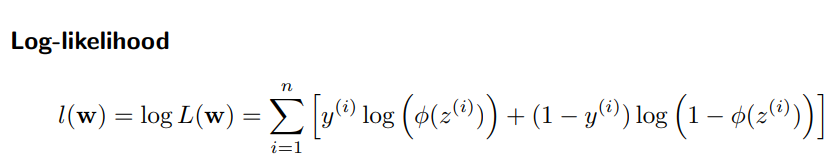

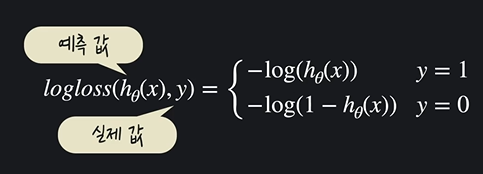

##Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÎπÑÏö©Ìï®ÏàòÏùò Ìé∏ÎèÑÌï®Ïàò

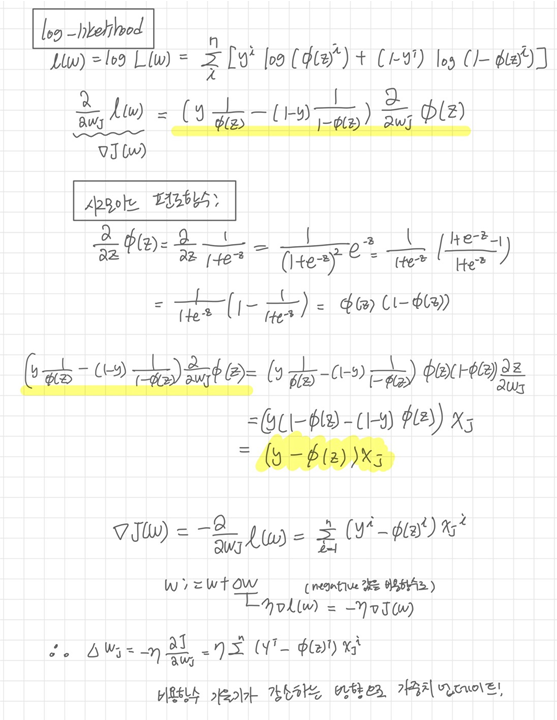

In [ ]:
from sklearn.linear_model import LogisticRegression
#ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎ•º ÌÜµÌï¥ ÎπÑÏÑ†ÌòïÏ†ÅÏù∏ ÌôïÎ•† Í∞íÏùÑ Î∞òÌôòÌïòÏßÄÎßå,
#ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÎèôÏûë


logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
y_pred = logistic_model.predict(X_test) # 0.5 Ïù¥ÏÉÅÏù¥Î©¥ 1, 0.5 ÎØ∏ÎßåÏù¥Î©¥ 0ÏúºÎ°ú Î∂ÑÎ•ò

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Ï†ïÌôïÎèÑ: {accuracy * 100:.2f}%")

Logistic Regression Ï†ïÌôïÎèÑ: 100.00%


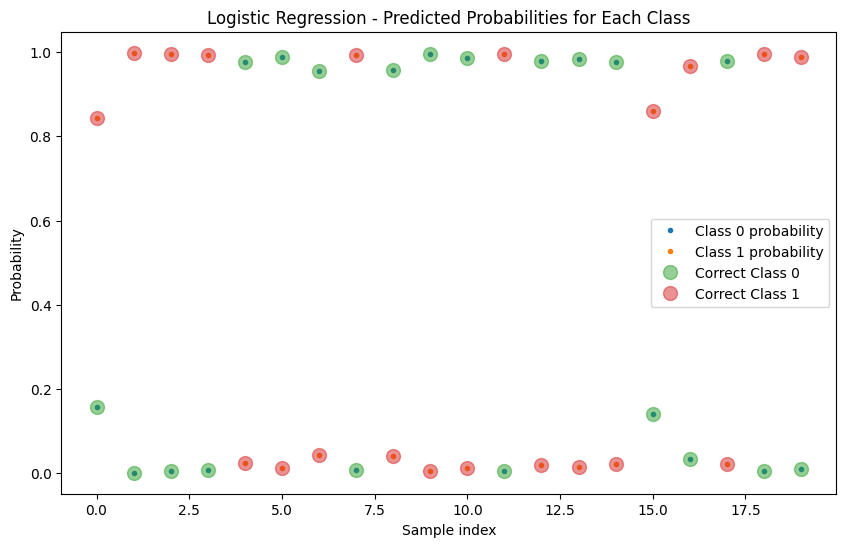

In [ ]:
import matplotlib.pyplot as plt

# Í∞Å ÏÉòÌîåÏù¥ Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÏÜçÌï† ÌôïÎ•†ÏùÑ Î∞òÌôò
y_prob = logistic_model.predict_proba(X_test)

# ÏòàÏ∏° Î†àÏù¥Î∏î (ÌÅ¥ÎûòÏä§ 0 ÎòêÎäî 1)Í≥º Ïã§Ï†ú Î†àÏù¥Î∏î ÎπÑÍµê
y_pred = logistic_model.predict(X_test)  # ÏòàÏ∏° Î†àÏù¥Î∏î
y_true = y_test  # Ïã§Ï†ú Î†àÏù¥Î∏î

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° ÌôïÎ•† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•†ÏùÑ ÌîåÎ°úÌåÖ
for i in range(y_prob.shape[1]):
    plt.plot(y_prob[:, i], marker='.', label=f'Class {i} probability', linestyle='')

# ÏòàÏ∏°Ïù¥ Ïã§Ï†ú Î†àÏù¥Î∏îÍ≥º ÏùºÏπòÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÍ∑∏ÎùºÎØ∏ ÌëúÏãú
correct_predictions = (y_pred == y_true)  # ÏòàÏ∏°Ïù¥ ÎßûÏùÄ ÏÉòÌîåÏùò Ïù∏Îç±Ïä§

# ÏòàÏ∏°Ïù¥ ÎßûÏùÄ ÏÉòÌîåÏóêÎßå ÏõêÌòï ÎßàÏª§Î•º Ï∂îÍ∞Ä
for i in range(y_prob.shape[1]):
    plt.plot([idx for idx, correct in enumerate(correct_predictions) if correct],
             [y_prob[idx, i] for idx, correct in enumerate(correct_predictions) if correct],
             'o', markersize=10, label=f'Correct Class {i}', alpha=0.5)

plt.xlabel('Sample index')
plt.ylabel('Probability')
plt.title('Logistic Regression - Predicted Probabilities for Each Class')
plt.legend()
plt.show()



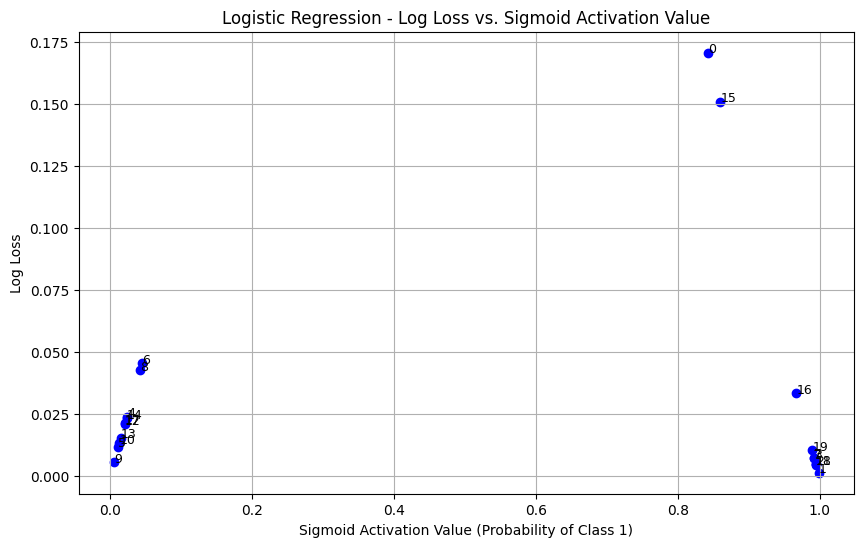

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÌôïÎ•†Í≥º ÏòàÏ∏°
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïùò ÌôïÎ•†
y_pred = logistic_model.predict(X_test)

# Î°úÍ∑∏ ÏÜêÏã§ Í≥ÑÏÇ∞
log_losses = [log_loss([true], [pred_prob], labels=[0, 1]) for true, pred_prob in zip(y_test, y_prob)]

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.figure(figsize=(10, 6))
plt.scatter(y_prob, log_losses, color='blue')
for i, (prob, loss) in enumerate(zip(y_prob, log_losses)):
    plt.text(prob, loss, f'{i}', fontsize=9)
plt.xlabel('Sigmoid Activation Value (Probability of Class 1)')
plt.ylabel('Log Loss')
plt.title('Logistic Regression - Log Loss vs. Sigmoid Activation Value')
plt.grid(True)
plt.show()


In [ ]:
X_test

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
57                4.9               2.4                3.3               1.0
77                6.7               3.0                5.0               1.7
63                6.1               2.9                4.7               1.4
51                6.4               3.2                4.5               1.5
7                 5.0               3.4                1.5               0.2
14                5.8               4.0                1.2               0.2
20                5.4               3.4                1.7               0.2
75                6.6               3.0                4.4               1.4
18                5.7               3.8                1.7               0.3
22                4.6               3.6                1.0               0.2
42                4.4               3.2                1.3               0.2
58                6.6               2.9                4.6               1.3
49                5.0               3.3                1.4               0.2
38                4.4               3.0                1.3               0.2
10                5.4               3.7                1.5               0.2
93                5.0               2.3                3.3               1.0
69                5.6               2.5                3.9               1.1
28                5.2               3.4                1.4               0.2
56                6.3               3.3                4.7               1.6
84                5.4               3.0                4.5               1.5

In [ ]:
y_test

57    1
77    1
63    1
51    1
7     0
14    0
20    0
75    1
18    0
22    0
42    0
58    1
49    0
38    0
10    0
93    1
69    1
28    0
56    1
84    1
Name: label, dtype: int64

In [ ]:
X_train

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
52                6.9               3.1                4.9               1.5
60                5.0               2.0                3.5               1.0
66                5.6               3.0                4.5               1.5
68                6.2               2.2                4.5               1.5
..                ...               ...                ...               ...
17                5.1               3.5                1.4               0.3
36                5.5               3.5                1.3               0.2
85                6.0               3.4                4.5               1.6
21                5.1               3.7                1.5               0.4
25                5.0               3.0                1.6               0.2

[80 rows x 4 columns]

In [ ]:
y_train

15    0
52    1
60    1
66    1
68    1
     ..
17    0
36    0
85    1
21    0
25    0
Name: label, Length: 80, dtype: int64

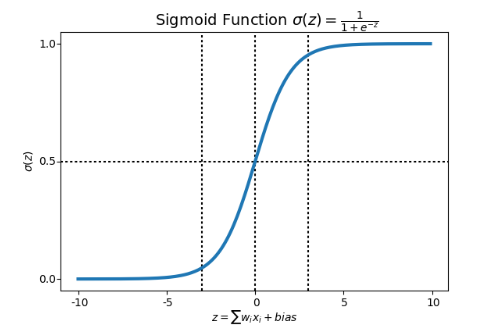

ÌÅ¥ÎûòÏä§ 1Ïóê ÏÜçÌï† ÌôïÎ•† pÎ•º Î°úÏßìÎ≥ÄÌôòÏùÑ Ìï¥Ï§òÏÑú ÏÑ†ÌòïÏ†ÅÏù∏ Í∞í(z=w^tx+...)Îì§Î°ú Î≥ÄÌôòÌïúÎã§.

 Ïù¥Î•º Ïù∏ÌíãÍ∞íÏúºÎ°úÌïòÎäî ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏóê ÎåÄÏûÖÌïòÎ©¥ ÌôïÎ•† PÎ•º ÏñªÏùÑ Ïàò ÏûàÏùå.

##Í≤ΩÍ≥ÑÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î†§Î≥¥Í∏∞

Logistic Regression Ï†ïÌôïÎèÑ: 100.00%


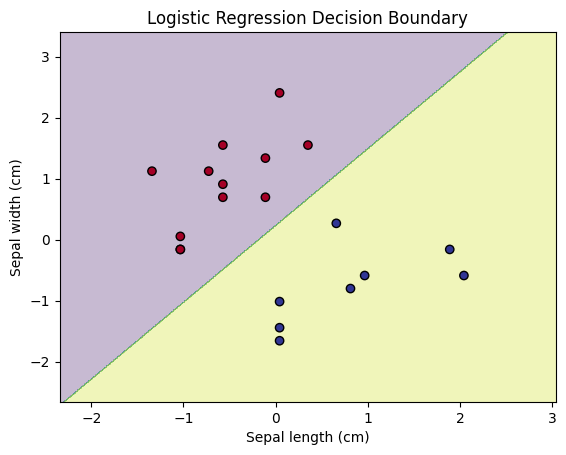

In [ ]:
# Îëê Í∞úÏùò ÌîºÏ≤ò ÏÑ†ÌÉù
X = binary_df[['sepal length (cm)', 'sepal width (cm)']]  # Îëê Í∞úÏùò ÌîºÏ≤ò ÏÑ†ÌÉù
y = binary_df['label']

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (ÌõàÎ†® ÏÖãÍ≥º ÌÖåÏä§Ìä∏ ÏÖã)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ (ÌëúÏ§ÄÌôî)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ (Îëê Í∞úÏùò ÌîºÏ≤ò ÏÇ¨Ïö©)
logistic_model_2features = LogisticRegression(max_iter=1000)
logistic_model_2features.fit(X_train, y_train)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
y_pred = logistic_model_2features.predict(X_test)

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Ï†ïÌôïÎèÑ: {accuracy * 100:.2f}%")

# Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

# Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏãúÍ∞ÅÌôî
plot_decision_boundary(X_test, y_test, logistic_model_2features)

##üìë
Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏóêÏÑú Îçî ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º ÏñªÏùÑ Ïàò ÏûàÏóàÏùå.

Ïù¥Ïú†Îäî ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏôÄ Î°úÍ∑∏ ÏÜêÏã§ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌôïÎ•† Í∏∞Î∞ò ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎ©∞, ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ Îçî Ïûò ÎåÄÏùëÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏.

 ADALINEÏùÄ ÏÑ†Ìòï Í≤∞Ï†ï Í≤ΩÍ≥ÑÎßå Ï∞æÏùÑ Ïàò ÏûàÏñ¥, ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ÏÑ±Îä•Ïù¥ Ï†ÄÌïòÎê† Ïàò ÏûàÍ≤†Îã§.